<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV

# Загрузка данных


https://www.kaggle.com/datasets/tarekmuhammed/telecom-customers


In [50]:
# Читаем датасет

dataset = pd.read_csv('/content/Telecom.csv', sep=',', encoding='cp1252')

# Подготовка данных

In [51]:
# размер датасета, 7043 записи, 21 столбец

dataset.shape

(7043, 21)

In [52]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [53]:
# Заменим пробелы на NaN и проверим, сколько пропущеных значений в датасете
dataset = dataset.replace(' ', np.NaN)
np.count_nonzero(dataset.isnull().sum(axis= 1).values)

11

In [54]:
# Проще всего избавиться от них удалив соответствующие записи

dataset = dataset.dropna()
np.count_nonzero(dataset.isnull().sum(axis= 1).values)

0

In [55]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [56]:
# customerID - это уникальное значение, можем его убрать
dataset = dataset.drop('customerID', axis=1)
# Заменяем бинарные переменные на 0 и 1
# Там где возможно на 0, 1 и -1
dataset = dataset.replace('Yes', 1).replace('No', 0).replace('Female', 0).replace('Male', 1).replace('No internet service', -1).replace('No phone service', -1)
# Категориальные переменные заменим на коды, создав для них дополнительные столбцы
# Столбец TotalCharges после удаления пустот можно заменить на float
dataset["Contract"] = dataset["Contract"].astype('category')
dataset["PaymentMethod"] = dataset["PaymentMethod"].astype('category')
dataset["InternetService"] = dataset["InternetService"].astype('category')
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)
dataset["Contract_cat"] = dataset["Contract"].cat.codes
dataset["PaymentMethod_cat"] = dataset["PaymentMethod"].cat.codes
dataset["InternetService_cat"] = dataset["InternetService"].cat.codes

In [57]:
# Проверим, что столбцы object отсутствуют
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               7032 non-null   int64   
 1   SeniorCitizen        7032 non-null   int64   
 2   Partner              7032 non-null   int64   
 3   Dependents           7032 non-null   int64   
 4   tenure               7032 non-null   int64   
 5   PhoneService         7032 non-null   int64   
 6   MultipleLines        7032 non-null   int64   
 7   InternetService      7032 non-null   category
 8   OnlineSecurity       7032 non-null   int64   
 9   OnlineBackup         7032 non-null   int64   
 10  DeviceProtection     7032 non-null   int64   
 11  TechSupport          7032 non-null   int64   
 12  StreamingTV          7032 non-null   int64   
 13  StreamingMovies      7032 non-null   int64   
 14  Contract             7032 non-null   category
 15  PaperlessBilling     7032 

# Анализ данных

In [58]:
# Посмотрим на датасет, готовый к работе
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_cat,PaymentMethod_cat,InternetService_cat
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,0,2,1
1,1,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,3,1
2,1,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,0,3,1
3,1,0,0,0,45,0,-1,DSL,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,1
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,2,2


In [59]:
# Pandas describe() используется для просмотра  основной статистической информации, таких как процентиль, среднее,
# стандартное отклонение и т.д. фрейма данных или ряда числовых значений:

dataset.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_cat,PaymentMethod_cat,InternetService_cat
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.325228,0.070392,0.128697,0.127702,0.073948,0.168231,0.172213,0.592719,64.798208,2283.300441,0.265785,0.688567,1.573237,1.224118
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.642585,0.705562,0.737917,0.737415,0.707715,0.756518,0.758252,0.491363,30.085974,2266.771362,0.441782,0.832934,1.067504,0.778643
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,0.000000,0.000000,2.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,1.000000,1.000000,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,2.000000,3.000000,2.000000


In [60]:
# Теперь проверим количество строк, которое принадлежит каждому классу:

dataset['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


Видим, что набор данных несбалансированный. Далее попробуем сбалансировать его

# Визуализация данных

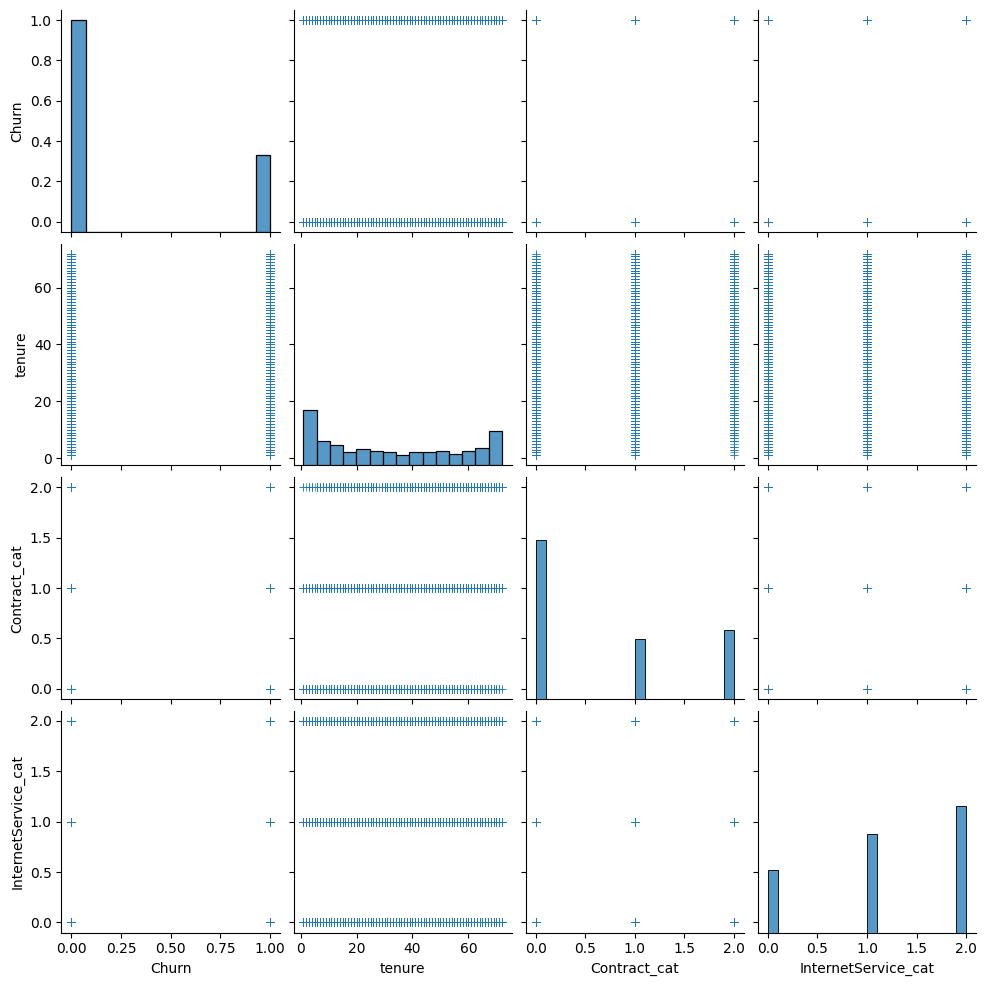

In [61]:
# Парный график
# Построение нескольких попарных двумерных распределений в наборе данных с помощью pairplot:

sns.pairplot(dataset[['Churn', 'tenure', 'Contract_cat', 'InternetService_cat']], markers='+')
plt.show()

In [62]:
# Создадим новый датасет без столбцов 'category'
dataset_new = dataset.select_dtypes(exclude=['category'])
dataset_new.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


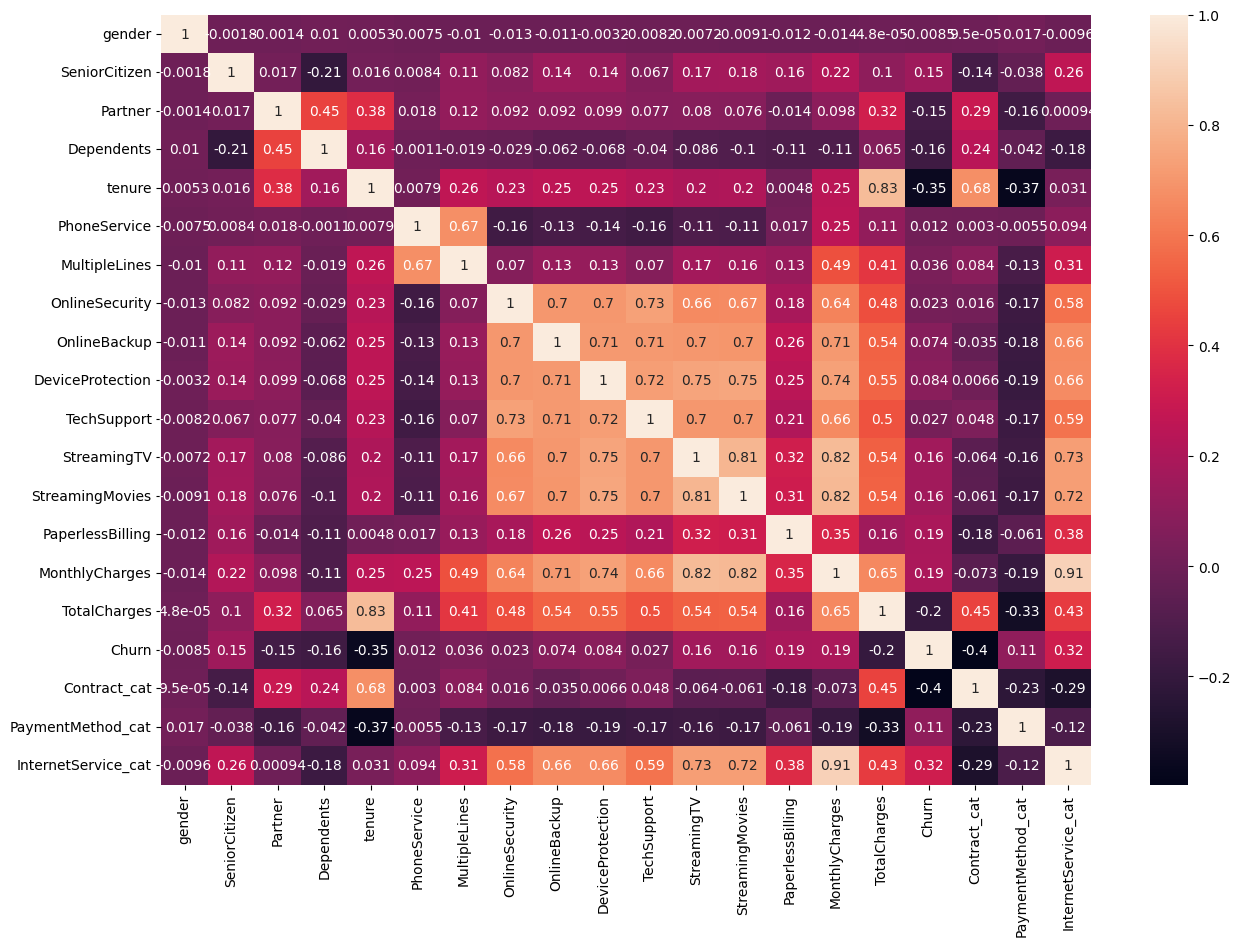

In [63]:
# Матрица корреляции

plt.figure(figsize=(15, 10)).add_subplot(1,1,1)
sns.heatmap(dataset_new.corr(), annot = True)
plt.show()

# Построение модели

## Разделение набора данных

Y  - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих фич.  В нашем случае это столбец Churn.

В X складываем весь набор данных без целевой переменной.


In [64]:
X = dataset_new.drop(['Churn'], axis=1)
y = dataset_new['Churn']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (7032, 19) | y shape: (7032,) 


X имеет 7032 строки и 19 столбцов, тогда как Y имеет 7032 строки и только один столбец.


## Train Test разделение

Разделяем наш набор данных на обучающий (train) и тестовый (test) с помощью train_test_split(), мы берем 80% данных для обучения нашей модели и 20% оставляем в качестве проверочного набора данных:

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [67]:
# Выполняем балансировку классов
if sum(y_train) < len(y_train) / 2:
    # Если класс-меньшинство составляет менее половины выборки, используем oversampling
    oversampler = SMOTE()
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)
else:
    # В противном случае используем undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

## Обучение и выбор оптимальной модели

Далее попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [68]:
# создаем лист для тех моделей, которые будем изучать
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.798225 (0.008155)
LDA: 0.790440 (0.006962)
KNN: 0.764047 (0.009458)
CART: 0.791172 (0.013038)
NB: 0.784483 (0.006011)
SVC: 0.803089 (0.012139)


SVC показала лучшие метрики среди всех алгоритмов.
Далее работаем с SVC.

Давайте обучим модель SVC на нашем обучающем наборе и сделаем прогноз на тестовом наборе на следующем шаге.

## Обучение конкретной модели
Выполним нормализацию данных

In [69]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_resampled)
scaled_x_test = scaler.transform(X_test)

In [70]:
# Выберем для модели SVC параметры kernel и C
svc = SVC()
grid_model = GridSearchCV(svc, {'kernel': ['linear', 'poly', 'rbf'], 'C': range(1, 5)}, cv = 5)
grid_model.fit(scaled_x_train, y_resampled)
grid_model.best_params_

{'C': 3, 'kernel': 'rbf'}

In [71]:
# Обучим модель на лучших параметрах и на обучающем наборе данных
svc = SVC(kernel=grid_model.best_params_['kernel'], C=grid_model.best_params_['C'])
svc.fit(scaled_x_train, y_resampled)
y_pred = svc.predict(scaled_x_test)

In [72]:
# Для линейного ядра можно вывести коэффициенты
if grid_model.best_params_['kernel'] == 'linear':
  print('\nКоэффициенты модели: ', model.coef_, model.intercept_)

## Визуализация решения

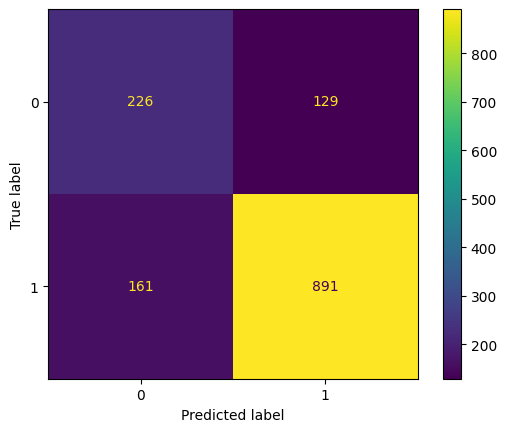

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1052
           1       0.58      0.64      0.61       355

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.73      1407
weighted avg       0.80      0.79      0.80      1407



In [73]:
# Проверим, насколко наша модель хороша
model_matrix = confusion_matrix(y_test, y_pred, labels = [1,0])
ConfusionMatrixDisplay(confusion_matrix = model_matrix).plot()
plt.show()
matrix = classification_report(y_test, y_pred)
print(matrix)

Accuracy получилась 0.74 - это неплохой результат для модели.